In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from porespy import generators
from tomo_encoders.misc_utils.feature_maps_vis import view_midplanes
import cupy as cp
import time

from tomopy import project
sys.path.append('..')
from recon_subvol import fbp_filter, recon_patch

import os
import signal
import tomocg as pt

### Generate data

In [47]:
# gen some data
sz = 320
[ntheta, nz, n] = [4200,sz,4200]
projs = np.zeros([ntheta,nz,n],dtype='float32')
projs[:,nz//2-sz//2:nz//2+sz//2,n//2-sz//2:n//2+sz//2]=1
theta = np.linspace(0,cp.pi,ntheta,dtype='float32')
center = n/2
pnz = 4  # number of slices for simultaneous processing in tomography

point = [0, 1800, 1800]
width = [sz, sz, sz]

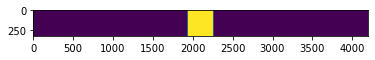

In [48]:
plt.imshow(projs[0])

### Reconstruct part

In [50]:
sub_vol = recon_patch(projs, theta, center, point, width, mem_limit_gpu = 50.0, apply_fbp = False)

6.0423903465271


In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (12,6))
view_midplanes(sub_vol, ax = ax)

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (16,16))
ax.imshow(sub_vol[0], cmap = 'gray')